In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
asd_origin = pd.read_csv('/Users/brogab/Documents/JAXFell25/data/syntactic_grooming_raw/asd_bouts_08232024.csv')

In [3]:
print(asd_origin.shape)
asd_origin.head(10)

(27337, 12)


,Start,Duration,State,Video_name,NetworkFilename,Strain,Sex,End,Syntax,Ordered_State,Bout,Filtered_State
0,0,4739,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,4739,Not_Grooming,0,0,0
1,4739,239,0,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,4978,Paw_Lick,1,1,1
2,4978,3,1,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,4981,Bilateral_Face_Wash,2,1,2
3,4981,1179,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,6160,Not_Grooming,0,0,0
4,6160,154,3,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,6314,Genital_Groom,5,2,5
5,6314,923,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7237,Not_Grooming,0,0,0
6,7237,96,3,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7333,Genital_Groom,5,3,5
7,7333,605,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7938,Not_Grooming,0,0,0
8,7938,21,1,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7959,Bilateral_Face_Wash,2,4,2
9,7959,26,0,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7985,Paw_Lick,1,4,1


In [4]:
print(asd_origin.columns)

Index(['Start', 'Duration', 'State', 'Video_name', 'NetworkFilename', 'Strain',
       'Sex', 'End', 'Syntax', 'Ordered_State', 'Bout', 'Filtered_State'],
      dtype='object')


In [5]:
vid_names = np.unique(asd_origin.loc[:, 'Video_name'])
print(vid_names.shape)

(101,)


In [6]:
vid_0 = asd_origin[asd_origin['Video_name'] == vid_names[0]]
vid_0.shape

(254, 12)

In [7]:
syntax = np.unique(vid_0['Syntax'])
print(syntax)

['Bilateral_Face_Wash' 'Flank_Lick' 'Genital_Groom' 'Not_Grooming'
 'Paw_Lick' 'Tail_Groom' 'Unilateral_Face_Wash']


In [8]:
sle = sklearn.preprocessing.LabelEncoder()
vid_0_synVec = vid_0['Syntax'].copy()
print(np.unique(vid_0_synVec))
vid_0_synVec_LE = sle.fit_transform(vid_0_synVec)
print(np.unique(vid_0_synVec_LE))

['Bilateral_Face_Wash' 'Flank_Lick' 'Genital_Groom' 'Not_Grooming'
 'Paw_Lick' 'Tail_Groom' 'Unilateral_Face_Wash']
[0 1 2 3 4 5 6]


0: Bilateral_Face_Wash
1: Flank_Lick
2: Genital_Groom
3: Not_Grooming
4: Paw_Lick
5: Tail_Groom
6: Unilateral_Face_Wash


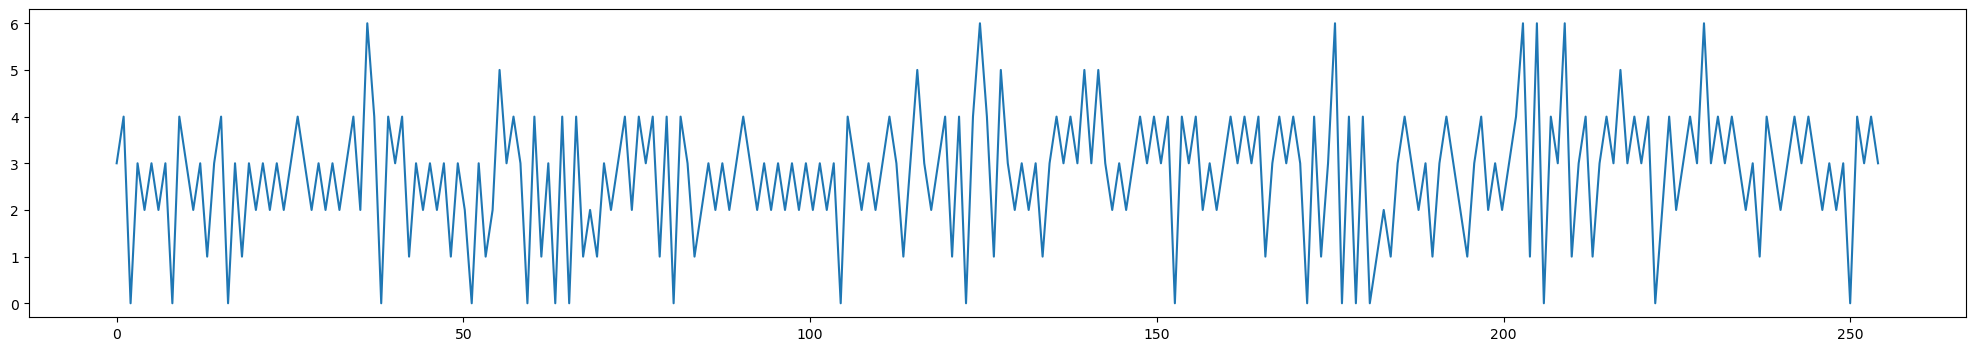

In [9]:
for i in range(np.unique(vid_0_synVec_LE).shape[0]):
    print(f'{i}: {np.unique(vid_0_synVec)[i]}')

x = np.linspace(0, vid_0_synVec_LE.shape[0], vid_0_synVec_LE.shape[0])

plt.figure(figsize=(25, 4))
plt.plot(x, vid_0_synVec_LE)
#plt.xticks(np.unique(vid_0_synVec))

plt.show()

In [10]:
print(np.unique(asd_origin['Video_name']).shape[0])

101


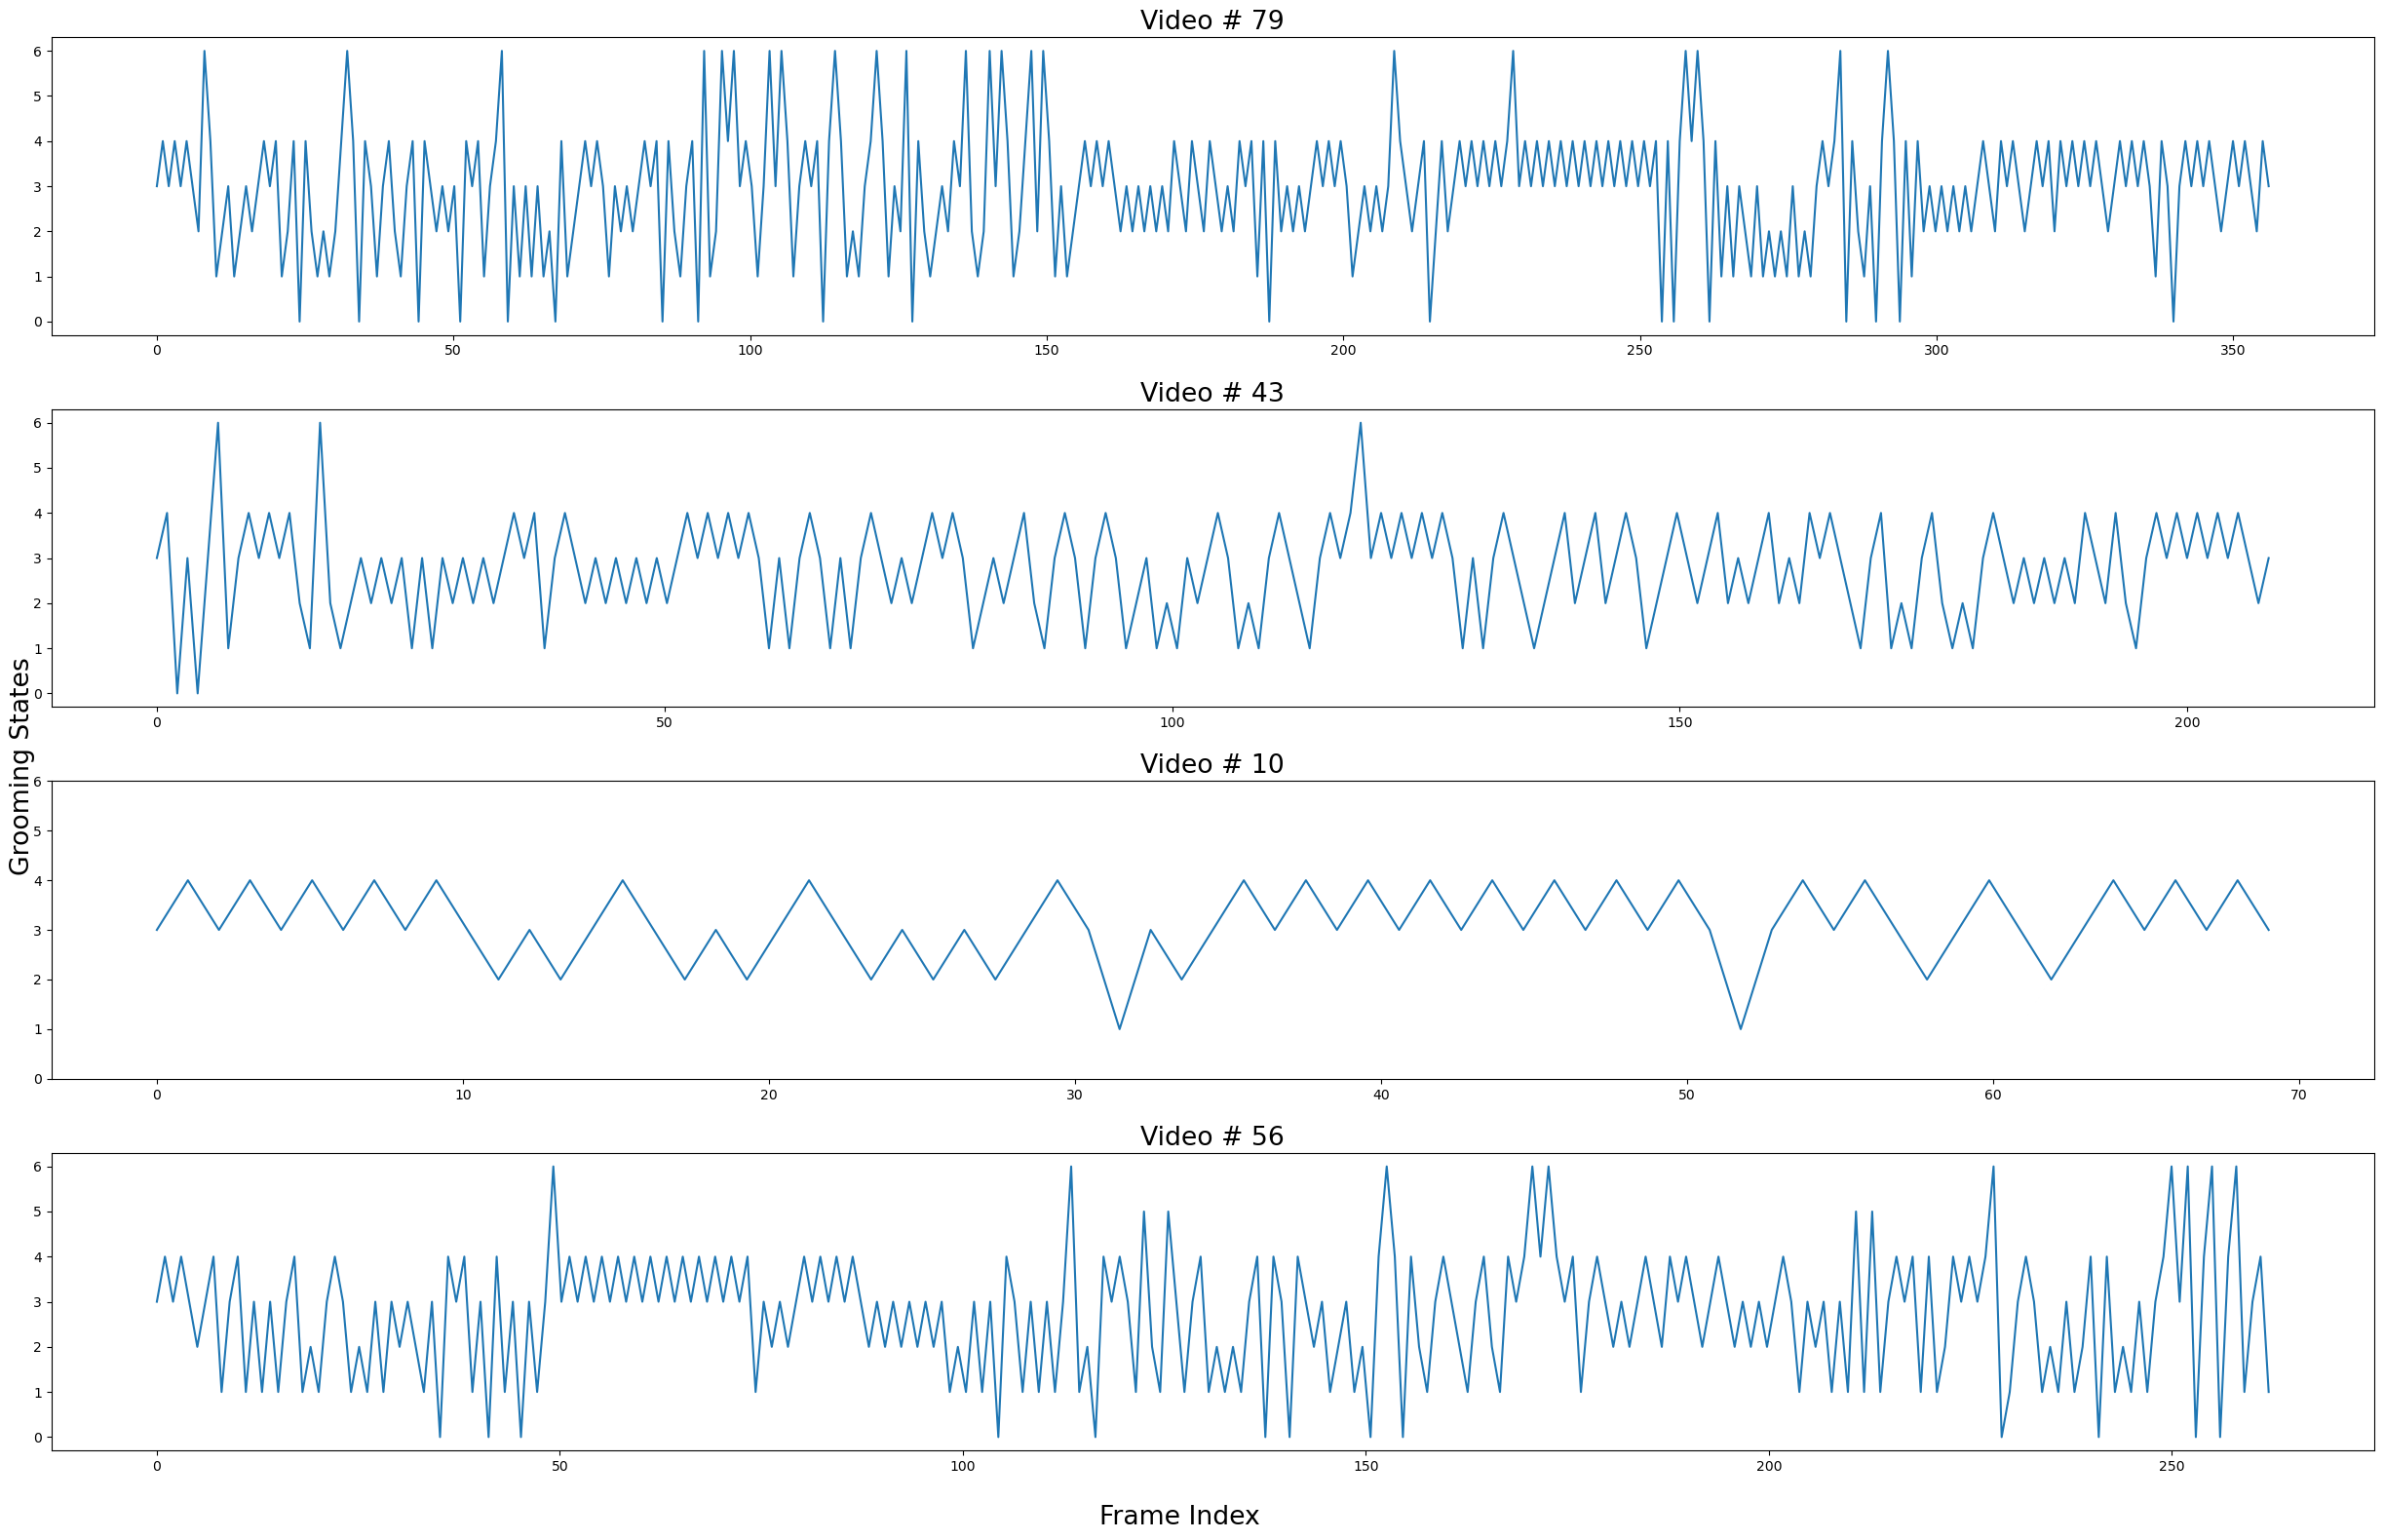

In [11]:
def vid_compare(df: pd.Dataframe, vid_ids: list, plot_size: tuple = None):
    "Displays syntax classifications for specified sequence of videos drawn from dataframe in plot array."

    sle = sklearn.preprocessing.LabelEncoder()
    le_vid_vec = sle.fit_transform(df['Video_name'].copy())
    le_syn_vec = sle.fit_transform(df['Syntax'].copy())

    #vid_ids_bvec = np.isin(le_vid_vec, vid_ids).astype(int)

    #sub_df = df.iloc[vid_ids_bvec, :]
    #le_syn_vec = sle.fit_transorm(df['Syntax'].copy())

    fig, axes = plt.subplots(len(vid_ids), 1, figsize=(25, 4*len(vid_ids)))
    plt.rcParams.update({'font.size': 16})

    for idx, vid_id in enumerate(vid_ids):
        x = np.linspace(0, le_syn_vec[le_vid_vec == vid_id].shape[0], le_syn_vec[le_vid_vec == vid_id].shape[0])
        axes[idx].plot(x, le_syn_vec[le_vid_vec == vid_id])

        axes[idx].set_title(f'Video # {vid_id + 1}')
        axes[idx].set_yticks(np.arange(0, 7))

        fig.supxlabel("Frame Index")
        fig.supylabel("Grooming States")

    plt.tight_layout()
    plt.show()

vid_compare(asd_origin, [78, 42, 9, 55])

In [99]:
asd_reorient = asd_origin.copy()

asd_reorient.head(10)

,Start,Duration,State,Video_name,NetworkFilename,Strain,Sex,End,Syntax,Ordered_State,Bout,Filtered_State
0,0,4739,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,4739,Not_Grooming,0,0,0
1,4739,239,0,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,4978,Paw_Lick,1,1,1
2,4978,3,1,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,4981,Bilateral_Face_Wash,2,1,2
3,4981,1179,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,6160,Not_Grooming,0,0,0
4,6160,154,3,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,6314,Genital_Groom,5,2,5
5,6314,923,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7237,Not_Grooming,0,0,0
6,7237,96,3,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7333,Genital_Groom,5,3,5
7,7333,605,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7938,Not_Grooming,0,0,0
8,7938,21,1,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7959,Bilateral_Face_Wash,2,4,2
9,7959,26,0,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7985,Paw_Lick,1,4,1


In [100]:
print(asd_reorient.loc[0, 'Video_name'])

asd/projects/kumar-lab/open-field-datasets/autism-gait-dataset/LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-42402-1-S157


In [101]:
asd_reorient_codes = {}

vid = 'asd/projects/kumar-lab/open-field-datasets/autism-gait-dataset/LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-42402-1-S157'

subset = asd_reorient.loc[asd_reorient['Video_name'] == vid, ['Syntax', 'Ordered_State']]

print(subset.shape)

for idx in range(subset.shape[0]):
    if not asd_reorient_codes.keys().__contains__(subset.loc[idx, 'Syntax']):
        asd_reorient_codes[subset.loc[idx, 'Syntax']] = subset.loc[idx, 'Ordered_State'].astype(np.uint8)


#asd_reorient_codes = sorted(asd_reorient_codes.items(), key=lambda item: item[1])
#asd_reorient_codes = dict(sorted(asd_reorient_codes.items(), key=lambda item: item[1]))

for key in asd_reorient_codes.keys():
    print(f'{key} : {asd_reorient_codes[key]}')

(254, 2)
Not_Grooming : 0
Paw_Lick : 1
Bilateral_Face_Wash : 2
Genital_Groom : 5
Flank_Lick : 4
Unilateral_Face_Wash : 3
Tail_Groom : 6


In [102]:
def vid_view_w_time(vid_df, vid_ids, encoding, plot_sz=None):
    fig, axes = plt.subplots(len(vid_ids), 1, figsize=(25, 4*len(vid_ids)))
    plt.rcParams.update({'font.size': 16})

    sle = sklearn.preprocessing.LabelEncoder()
    le_vid_vec = sle.fit_transform(vid_df['Video_name'].copy())

    for idx, vid_id in enumerate(vid_ids):

        cur_vid = vid_df.loc[le_vid_vec == vid_id, :]

        #print(np.unique(cur_vid['Video_name']).shape[0])

        t_min = np.min(cur_vid.loc[:, 'Start'])
        t_max = np.max(cur_vid.loc[:, 'End'])

        x = np.linspace(0, t_max-t_min, t_max-t_min)
        y = np.zeros((t_max-t_min,))
        for i in range(len(cur_vid)):
            cur_bout = cur_vid.iloc[i, :]
            strt = cur_bout['Start']
            dur = cur_bout['Duration']
            state = cur_bout['Ordered_State']

            y[strt:strt+dur] = state

        #print(y.shape)
        #print(x.shape)
        #print(np.unique(y))

        #x = np.linspace(0, le_syn_vec[le_vid_vec == vid_id].shape[0], le_syn_vec[le_vid_vec == vid_id].shape[0])
        axes[idx].plot(x, y)

        axes[idx].set_title(f'Video # {vid_id + 1}')
        axes[idx].set_yticks(np.arange(0, 7))

        fig.supxlabel("Frame Index")
        fig.supylabel("Grooming States")

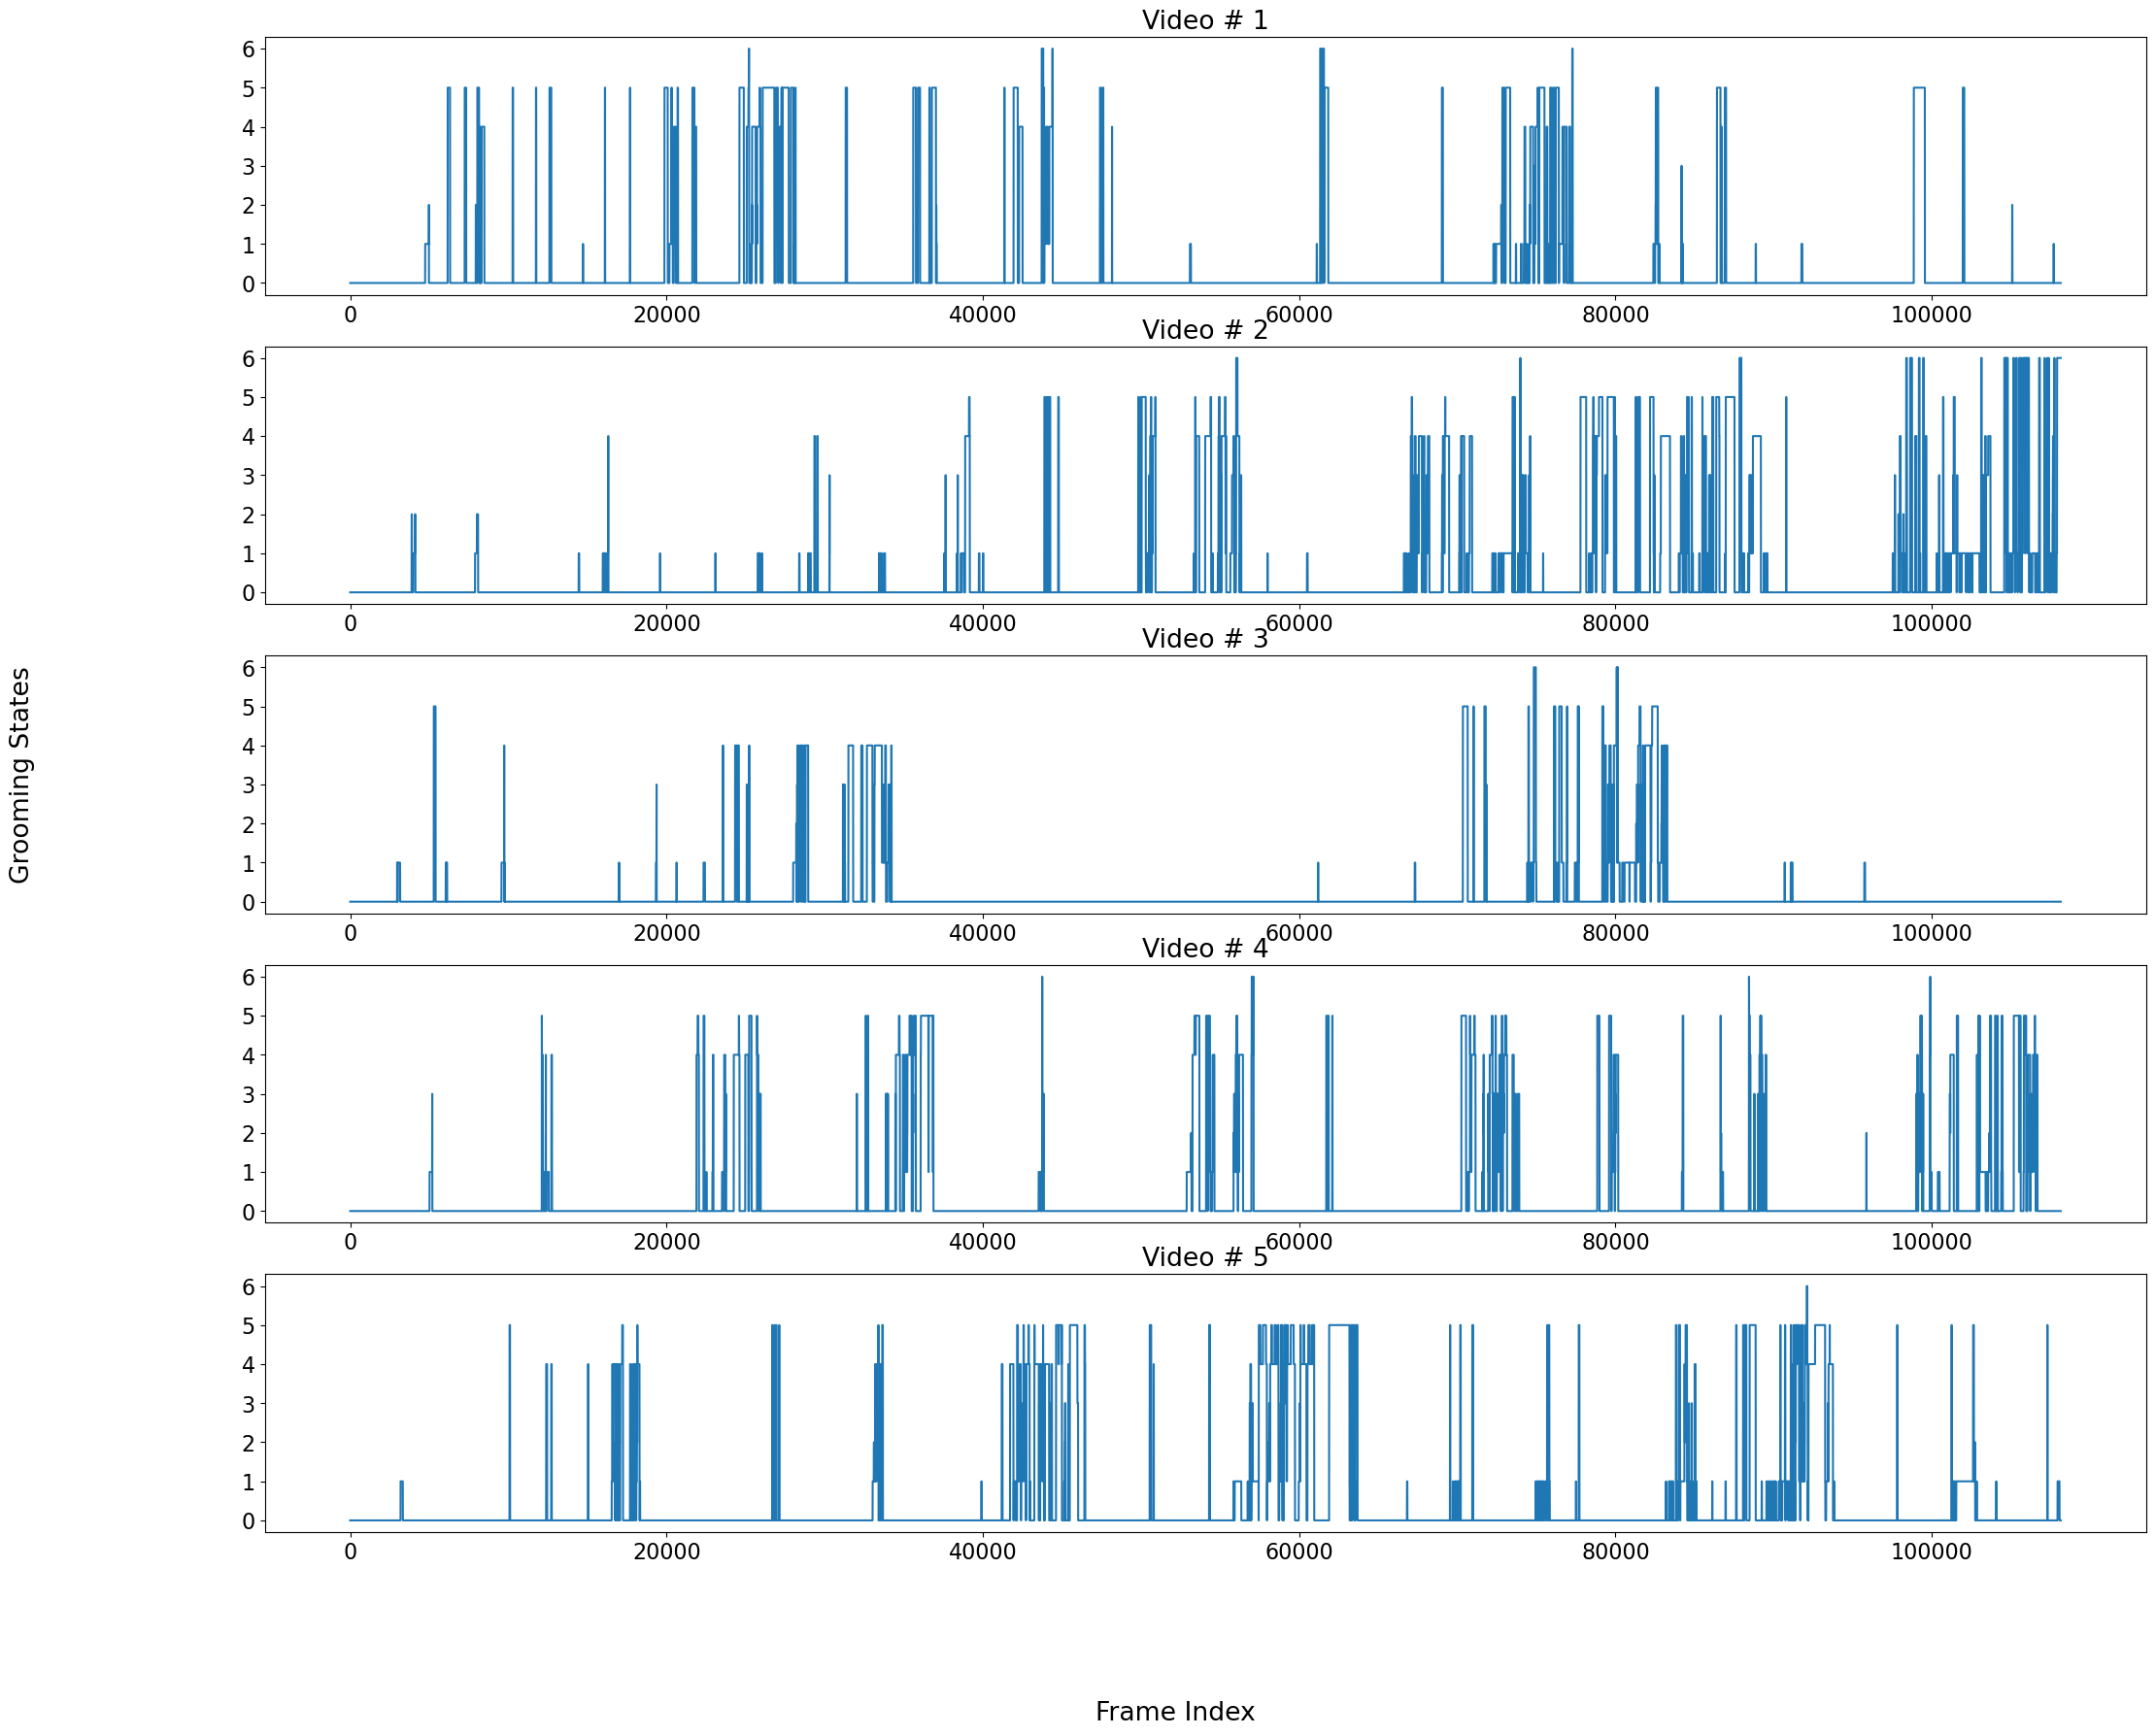

In [103]:
vid_view_w_time(asd_reorient, np.arange(0, 5), None)

In [104]:
def visualize_bouts_in_vid(vid_df, vid_id: int, activity_threshold: int = 1000, temporal_buffer: int = 3000, scan_density: int = 25, fig_dim: tuple = (25, 3)):
    plt.rcParams.update({'font.size': 16})

    sle = sklearn.preprocessing.LabelEncoder()
    le_vid_vec = sle.fit_transform(vid_df['Video_name'].copy())

    vid = vid_df.loc[le_vid_vec == vid_id, :]

    t_min = np.min(vid.loc[:, 'Start'])
    t_max = np.max(vid.loc[:, 'End'])
    y = np.zeros((t_max-t_min,))

    for i in range(len(vid)):
        cur_bout = vid.iloc[i, :]
        strt = cur_bout['Start']
        dur = cur_bout['Duration']
        state = cur_bout['Ordered_State']
        y[strt:strt+dur] = state
    
    bouts = {}

    test_indices = np.linspace(0, y.shape[0], scan_density)

    for idx in test_indices:

        win_min = 0
        win_max = (idx + temporal_buffer).astype(int)

        if idx > temporal_buffer:
            win_min = (idx - temporal_buffer).astype(int)
        if win_max > y.shape[0]:
            win_max = (y.shape[0])

        total_active_in_win = np.sum(y[win_min:win_max] != 0)

        if total_active_in_win > activity_threshold:
            bouts[f'bout_{idx}'] = (win_min, win_max, y)
        
    
    fig, axes = plt.subplots(len(bouts), 1, figsize=(fig_dim[0], fig_dim[1]*len(bouts)))
    #plt.tight_layout()
    fig.subplots_adjust(hspace=1)
    if len(bouts) == 1:
        axes = [axes]

    for ax_i, bout in enumerate(bouts.keys()):

        win_min, win_max, _ = bouts[bout]
        win_sz = win_max - win_min
        bout_y = y[win_min:win_max]

        x = np.linspace(win_min, win_max, win_sz)

        axes[ax_i].plot(x, bout_y)
        axes[ax_i].set_title(f'{bout}, window ({win_min} : {win_max})')
        axes[ax_i].set_yticks(np.arange(0, 7))

    fig.supxlabel("Frame Index")
    fig.supylabel("Grooming States")
    fig.suptitle(f'Video {vid_id}')

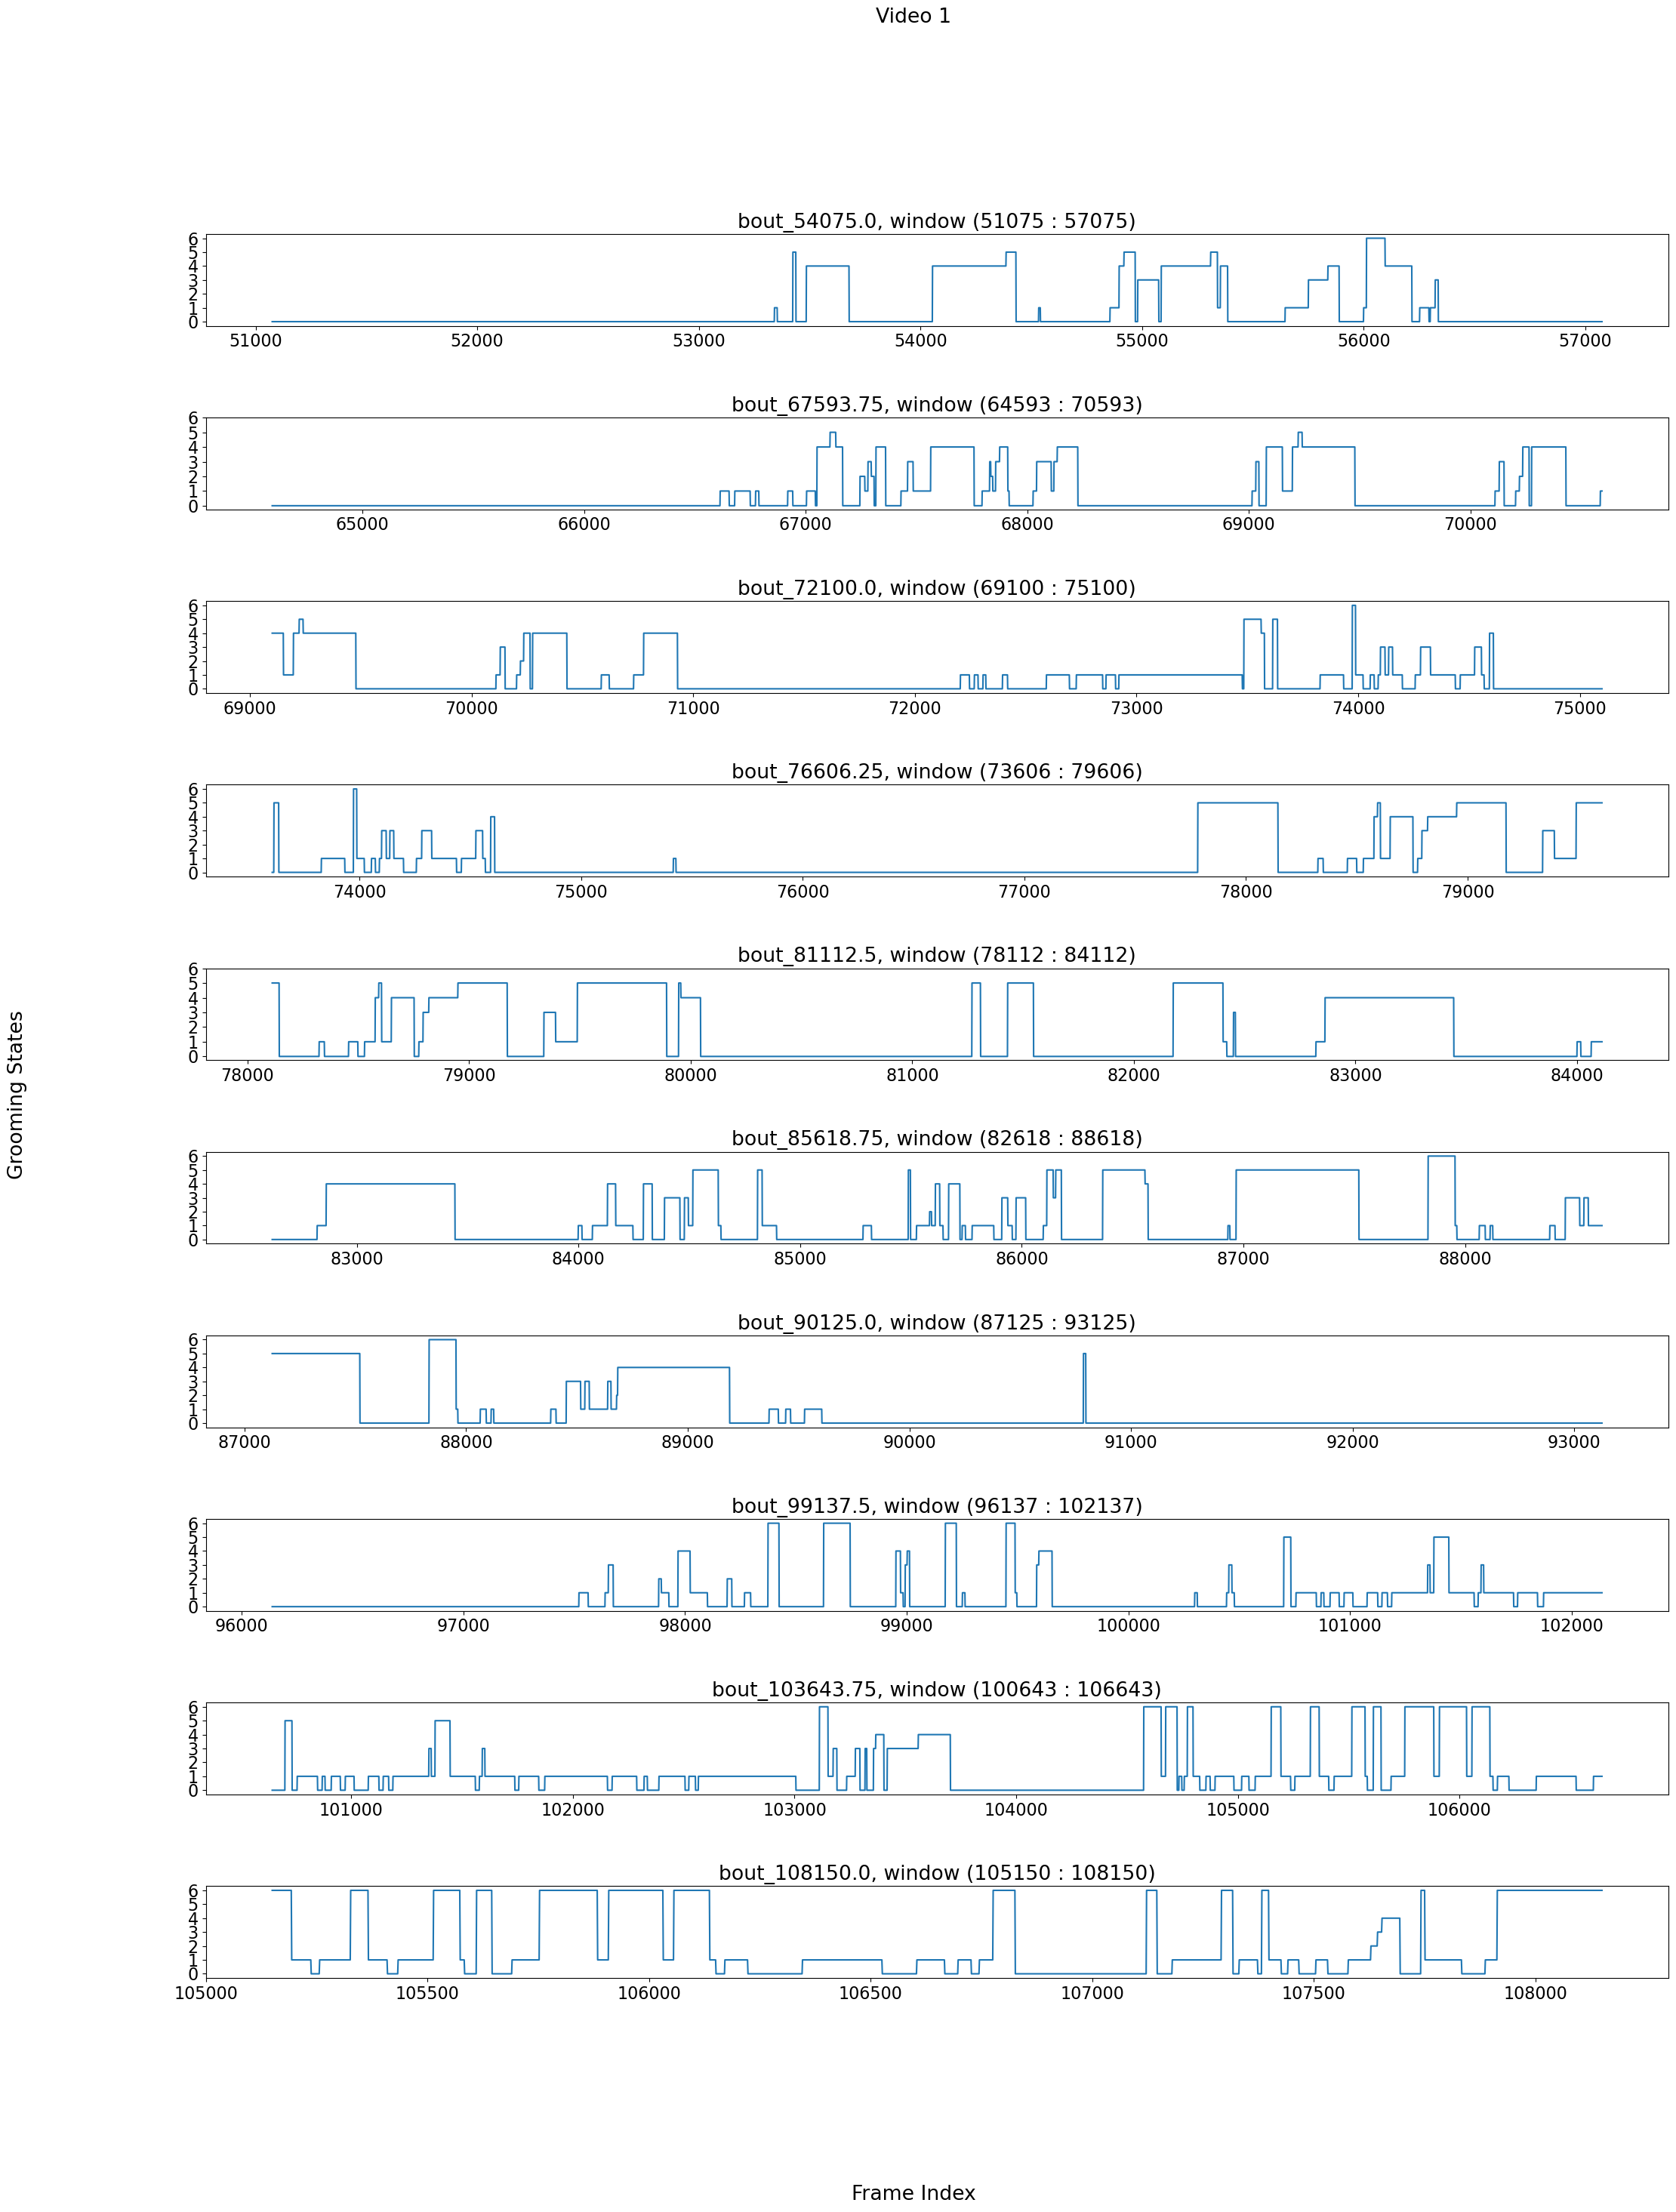

In [105]:
visualize_bouts_in_vid(asd_reorient, 1)

In [124]:
def manual_inspect(vid_df, vid_id: int, window: tuple):
    ''''''
    sle = sklearn.preprocessing.LabelEncoder()
    le_vid_vec = sle.fit_transform(vid_df['Video_name'].copy())

    vid = vid_df.loc[le_vid_vec == vid_id, :]

    t_min = np.min(vid.loc[:, 'Start'])
    t_max = np.max(vid.loc[:, 'End'])
    y = np.zeros((t_max-t_min,))

    for i in range(len(vid)):
        cur_bout = vid.iloc[i, :]
        strt = cur_bout['Start']
        dur = cur_bout['Duration']
        state = cur_bout['Ordered_State']
        y[strt:strt+dur] = state

    y_view = y[window[0]:window[1]]
    x = np.linspace(window[0], window[1], y_view.shape[0])

    plt.title(f'Vid # {vid_id}')
    plt.xlabel(f'Frame Slice')
    plt.ylabel(f'Grooming State')

    plt.plot(x, y_view)
    plt.show()

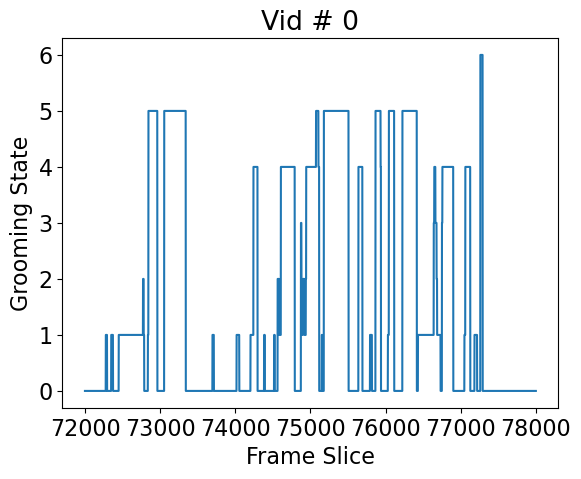

In [125]:
manual_inspect(asd_reorient, 0, (72000, 78000))